<a href="https://colab.research.google.com/github/Chukwugude/Machine-Learning-projects/blob/main/ANN_regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# Creating the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between (-3 + 3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

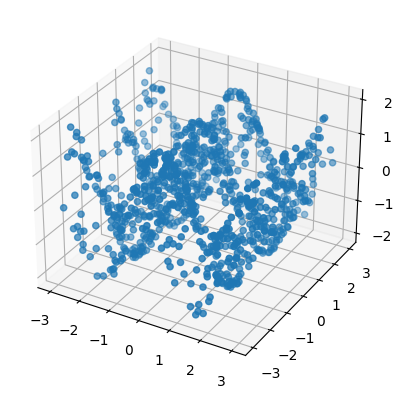

In [5]:
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
# plt.show()

In [6]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)
])

In [7]:
#Compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.0537
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0119
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9828
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9574
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9110
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8391
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7512
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6967
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6456
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5630
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5708
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5944
Epoch 13/100
32/32 [=================

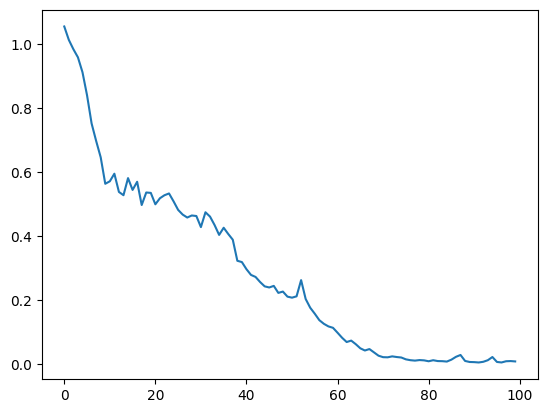

In [8]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

79/79 [==============================] - 1s 13ms/step


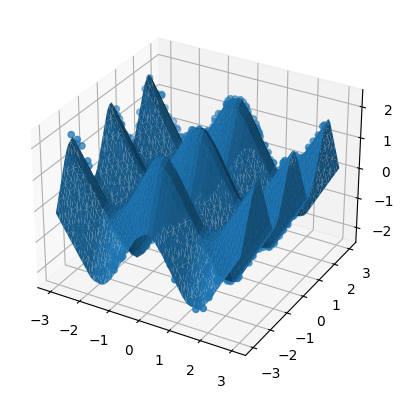

In [10]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

79/79 [==============================] - 0s 2ms/step


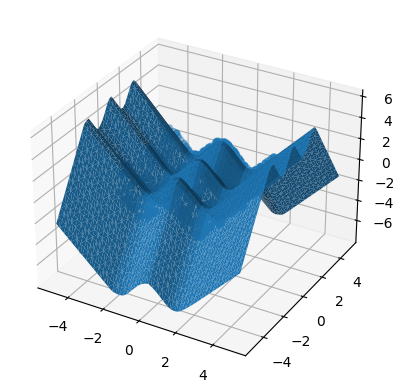

In [11]:
# Plot the prediction surface and check if it can extrapolate
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()